# **DAY 11: ASSIGNMENT 9 (Logistic Regression Model)**

# **DATE: 8 JUNE 2021**

# **AUTHOR: AAMIR P**

#**REG. ID.: GO_STP_7724**

<b>Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle.

 Link: https://www.kaggle.com/giripujar/hr-analytics

First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.</b>

In [90]:
#Needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Since there are a lot of data to visualize a heatmap is needed. The heatmap is an attribute of sns.

In [91]:
#Read the csv file
df=pd.read_csv('/content/HR_comma_sep.csv')

In [92]:
#Check missing values
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

**DATA VISUALISATION**

In [93]:
df.shape

(14999, 10)

In [94]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [95]:
#Summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**VISUALIZATION**

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


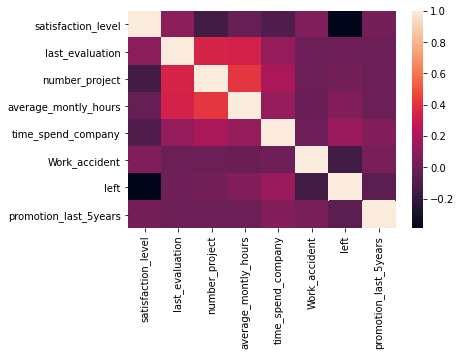

In [96]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)
corr

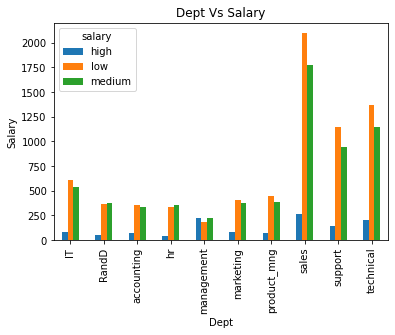

In [97]:
#Dept Vs Salary
pd.crosstab(df.Department ,df.salary).plot(kind='bar')
plt.title('Dept Vs Salary') #both are objects easy to compare and draw graph
plt.xlabel('Dept')
plt.ylabel('Salary')
plt.show()

**OBSERVATION**

Most of the employees are less paid

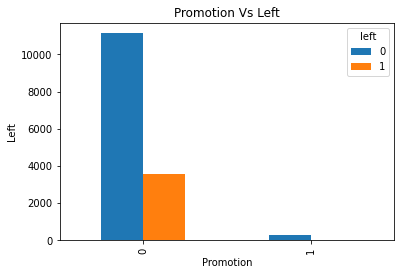

In [98]:
#Promotion Vs Left
pd.crosstab(df.promotion_last_5years ,df.left).plot(kind='bar')
plt.title('Promotion Vs Left') #both are int easy to compare and draw graph
plt.xlabel('Promotion')
plt.ylabel('Left')
plt.show()

**OBSERVATION**

Very less are getting promoted

**MODEL**

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder #to change raw feature vectors into a representation ; Encode target labels
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [119]:
# Create base rate model to check the accuracy of a normal and a logistic regression model
def base_rate_model(X) :
  y = np.zeros(X.shape[0])
  return y

In [123]:
# Create train and test splits
target_name = 'left'
X = df.drop('left', axis=1)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123)

In [124]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.77


In [125]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.76


In [127]:
#to check the observations
confusion_matrix(y_test,y_base_rate)

array([[1730,    0],
       [ 520,    0]])